### 패키지 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 관련 패키지
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# 학습 콜백 처리 관련 패키지
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# 데이터 표준화
from sklearn.preprocessing import StandardScaler

# 오차 행렬
from sklearn.metrics import confusion_matrix

### 데이터 로딩

In [2]:
df = pd.read_excel("http://itpaper.co.kr/data/titanic.xlsx", engine='openpyxl')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 데이터 전처리

#### 결측치 확인

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 결측치 정제

In [4]:
# 결측치가 가장 많은 방 호수는 생존여부에 큰 영향을 주지않는 변수라 생각하고 삭제

if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [5]:
# 탑승지 컬럼 최빈값 대체
# 탑승지 데이터는 결측치가 많지 않기 때문에 최빈값(가장많이 등장하는 값)으로 대체한다.

most_frequent = df['Embarked'].mode()
print("최빈값 : ", most_frequent[0])

df['Embarked'].fillna(most_frequent[0], inplace=True)
df.isna().sum()

최빈값 :  S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [6]:
# 나이 컬럼 중앙값 대체

df['Age'].fillna(df['Age'].median(), inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### 인덱스 설정

In [7]:
if 'PassengerId' in df.columns:
    df.set_index('PassengerId', inplace = True)
    
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


#### 컬럼 정보 확인

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


#### 범주형 변수의 타입 변환

In [9]:
df["Sex"] = df["Sex"].astype('category').cat.rename_categories({
    'male': 1, 'female': 0
})
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df["Pclass"].astype('category').cat.reorder_categories([1, 2, 3])
df["Embarked"] = df["Embarked"].astype('category').cat.rename_categories({
    'S':1, 'C':2, "Q":3
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Embarked  891 non-null    category
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 52.7+ KB


### EDA

#### 기본 정보 확인

In [10]:
df.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,0.523008,0.381594,32.204208
std,13.019697,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


#### 생존률 확인하기

[Text(0, 0, '사망'), Text(1, 0, '생존')]

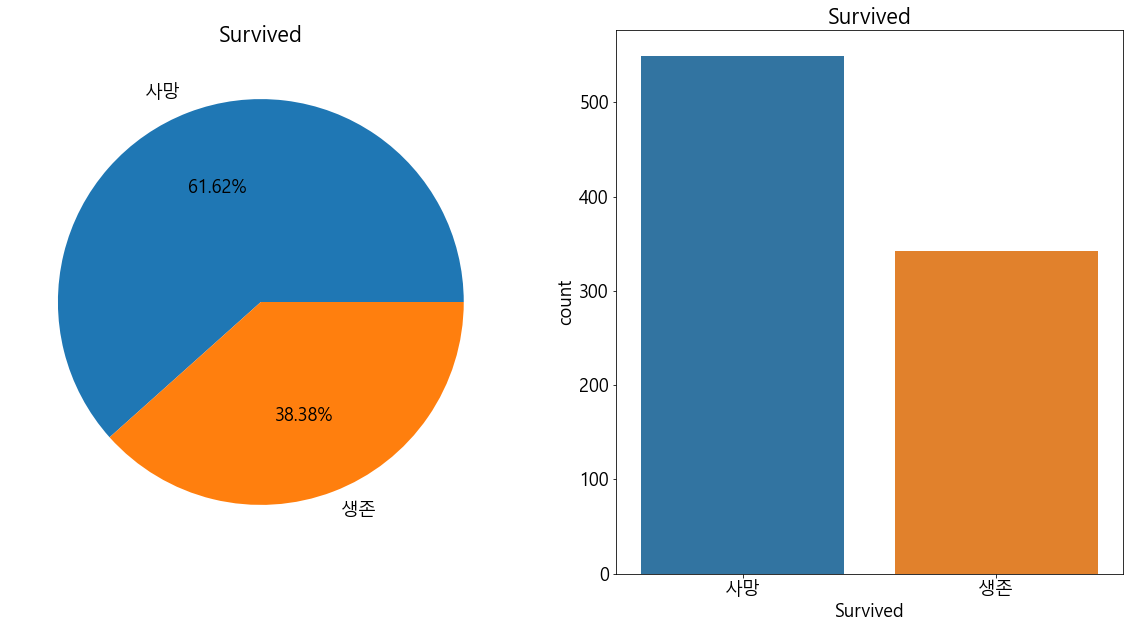

In [11]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 18                

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

vc = df['Survived'].value_counts()
ax1.pie(vc, labels = ['사망', '생존'], autopct = '%1.2f%%')
ax1.set_title('Survived')
ax1.set_ylabel('')

sns.countplot(x=df['Survived'], ax=ax2)
ax2.set_title('Survived')

ax2.set_xticks([0, 1])
ax2.set_xticklabels(['사망', '생존'])



#### 객실에 따른 생존률

In [12]:
# 각선실별 탁승객 수 확인하기

pclass_total_df = df[['Pclass', 'Survived']].groupby('Pclass').count()
pclass_total_df

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
# 각 선실별 생존자 수 확인하기

pclass_surv_df = df[['Pclass', 'Survived']].query('Survived==1').groupby('Pclass').count()
pclass_surv_df

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
# 각 선실별 생존자 비율 확인하기

ratio = (pclass_surv_df['Survived'] / pclass_total_df['Survived']) * 100
ratio

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Text(0, 0.5, 'Survived')

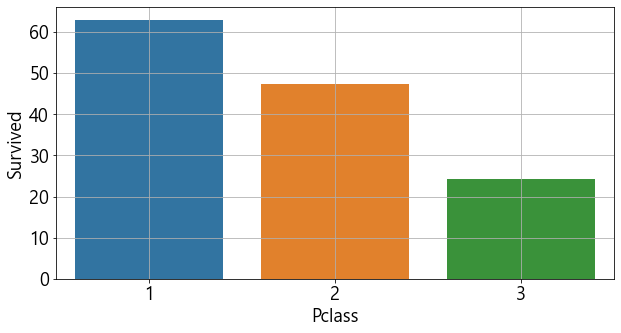

In [15]:
# 각 선실별 생존자 비율 시각화

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x=ratio.index, y=ratio, ax=ax)
ax.grid()
ax.set_ylabel("Survived")

#### 성별에 따른 생존률

[Text(0, 0, '여자'), Text(1, 0, '남자')]

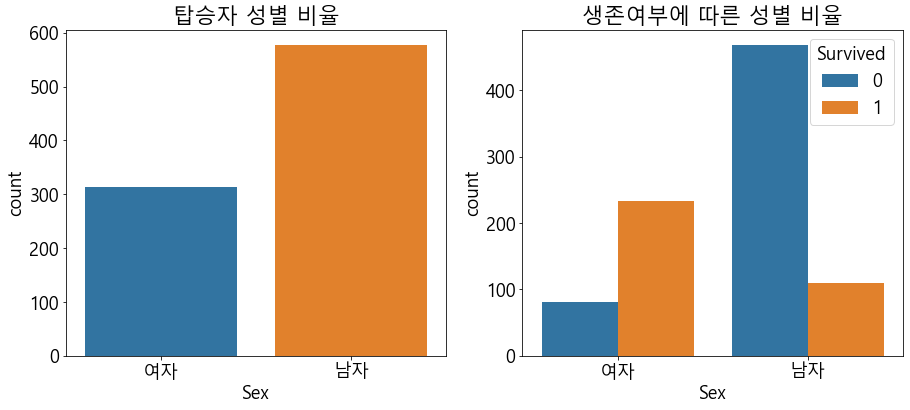

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='Sex', ax=ax[0])
ax[0].set_title('탑승자 성별 비율')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['여자', '남자'])

sns.countplot(data=df, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('생존여부에 따른 성별 비율')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['여자', '남자'])


#### 연령에 따른 생존 비율

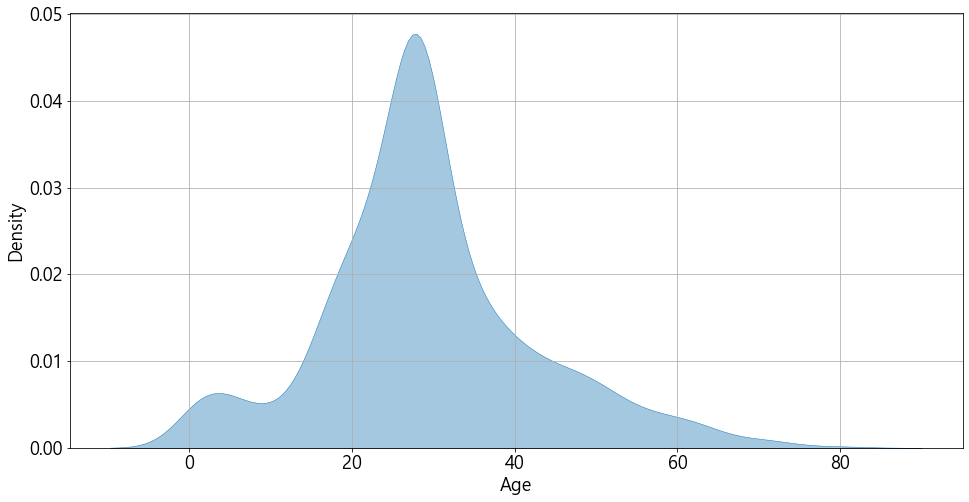

In [17]:
# 연령분포 확인하기

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.kdeplot(data=df, x="Age", fill=True, alpha=0.4, linewidth=0.5, ax=ax)
ax.grid()


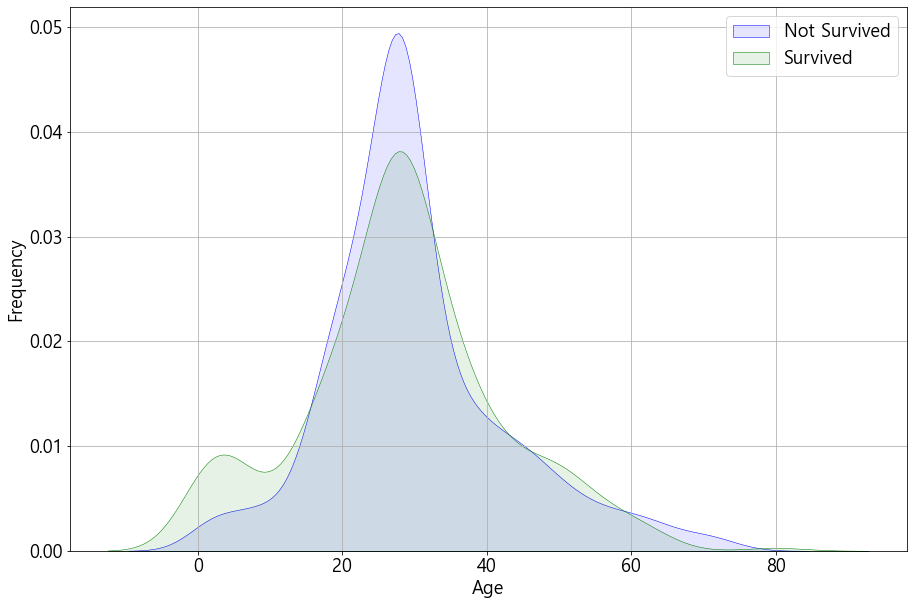

In [18]:
# 생존 여부에 따른 연력 분포 곡선

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

sns.kdeplot(df["Age"][(df["Survived"] == 0)], fill=True, alpha=0.1, linewidth=0.5, color="Blue", ax=ax)

sns.kdeplot(df["Age"][(df["Survived"] == 1)], fill=True, alpha=0.1, linewidth=0.5, color="Green", ax=ax)

ax.grid()
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.legend(['Not Survived', 'Survived'])

### 데이터 셋 분할하기

#### 랜덤 시드 고정

In [19]:
np.random.seed(777)

#### 딥러닝을 위한 데이터 타입 변환

In [20]:
# 생존 유무
df['Survived'] = df['Survived'].astype(np.float32)
# 객실 등급
df['Pclass'] = df['Pclass'].astype(np.float32)
# 성별
df['Sex'] = df['Sex'].astype(np.float32)
# 형제 혹은 부부의 수
df['SibSp'] = df['SibSp'].astype(np.float32)
# 부모 혹은 자녀의 수
df['Parch'] = df['Parch'].astype(np.float32)
# 지불한 운임
df['Fare'] = df['Fare'].astype(np.float32)
# 나이
df['Age'] = df['Age'].astype(np.float32)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    float32 
 1   Pclass    891 non-null    float32 
 2   Name      891 non-null    object  
 3   Sex       891 non-null    float32 
 4   Age       891 non-null    float32 
 5   SibSp     891 non-null    float32 
 6   Parch     891 non-null    float32 
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float32 
 9   Embarked  891 non-null    category
dtypes: category(1), float32(7), object(2)
memory usage: 78.5+ KB


#### 훈련데이터(독립변수)와 레이블(종속변수) 구분하기

In [21]:
x_data = df.drop(['Survived', 'Name', 'Ticket', 'Embarked'], axis=1)
y_data = df.filter(['Survived'])

#### 데이터 표준화

In [22]:
scaler = StandardScaler()
std = scaler.fit_transform(x_data)
std_x_train = pd.DataFrame(std, columns=x_data.columns, index=x_data.index)
std_x_train

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445
2,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845
3,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854
4,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730
5,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...
887,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.386671
888,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.044381
889,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263


#### 훈련 데이터와 검증 데이터로 분할

In [23]:
x_train, x_test, y_train, y_test = train_test_split(std_x_train, y_data,
                                   test_size=0.3, random_state=777)

### 모델 개발

#### 모델 정의

In [24]:
model = Sequential()

model.add(Dense(128, input_shape=(len(x_train.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 11,777
Trainable params: 11,777
Non-trainable params: 0
_________________________________________________________________


#### 학습하기

In [25]:
result = model.fit(x_train, y_train, epochs = 500, 
                   validation_data = (x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, 
                      min_lr=0.0001, verbose=1)])

result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
20/20 [==============================] - 1s 16ms/step - loss: 0.5484 - acc: 0.7913 - val_loss: 0.5082 - val_acc: 0.7799
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4367 - acc: 0.8299 - val_loss: 0.4838 - val_acc: 0.7948
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4057 - acc: 0.8363 - val_loss: 0.4778 - val_acc: 0.7873
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.3880 - acc: 0.8331 - val_loss: 0.4851 - val_acc: 0.7910
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.3829 - acc: 0.8395 - val_loss: 0.5016 - val_acc: 0.7873
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.3756 - acc: 0.8427 - val_loss: 0.5070 - val_acc: 0.7873

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.3689 - acc: 0.8491 - val_loss: 0.4973 - val_acc: 0.7873
E

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,0.548399,0.791332,0.508247,0.779851,0.0010
2,0.436678,0.829856,0.483761,0.794776,0.0010
3,0.405727,0.836276,0.477774,0.787313,0.0010
4,0.388043,0.833066,0.485128,0.791045,0.0010
5,0.382936,0.839486,0.501553,0.787313,0.0010
6,0.375578,0.842697,0.507027,0.787313,0.0010
7,0.368932,0.849117,0.497313,0.787313,0.0005
8,0.368533,0.844302,0.500505,0.787313,0.0005


### 학습 결과 평가

#### 모델 성능 평가

In [26]:
# 훈련데이터에 대한 모델 성능 평가

evaluate = model.evaluate(x_train, y_train)
print("최종 손실률 : %f, 최종 정확도 : %f" % (evaluate[0], evaluate[1]))

20/20 [==============================] - 0s 2ms/step - loss: 0.3588 - acc: 0.8523
최종 손실률 : 0.358760, 최종 정확도 : 0.852327


In [27]:
# 검증 데이터에 대한 모델 성능 평가

evaluate = model.evaluate(x_test, y_test)
print("최종 손실률 : %f, 최종 정확도 : %f" % (evaluate[0], evaluate[1]))

9/9 [==============================] - 0s 1ms/step - loss: 0.5005 - acc: 0.7873
최종 손실률 : 0.500505, 최종 정확도 : 0.787313


#### 학습결과 시각화

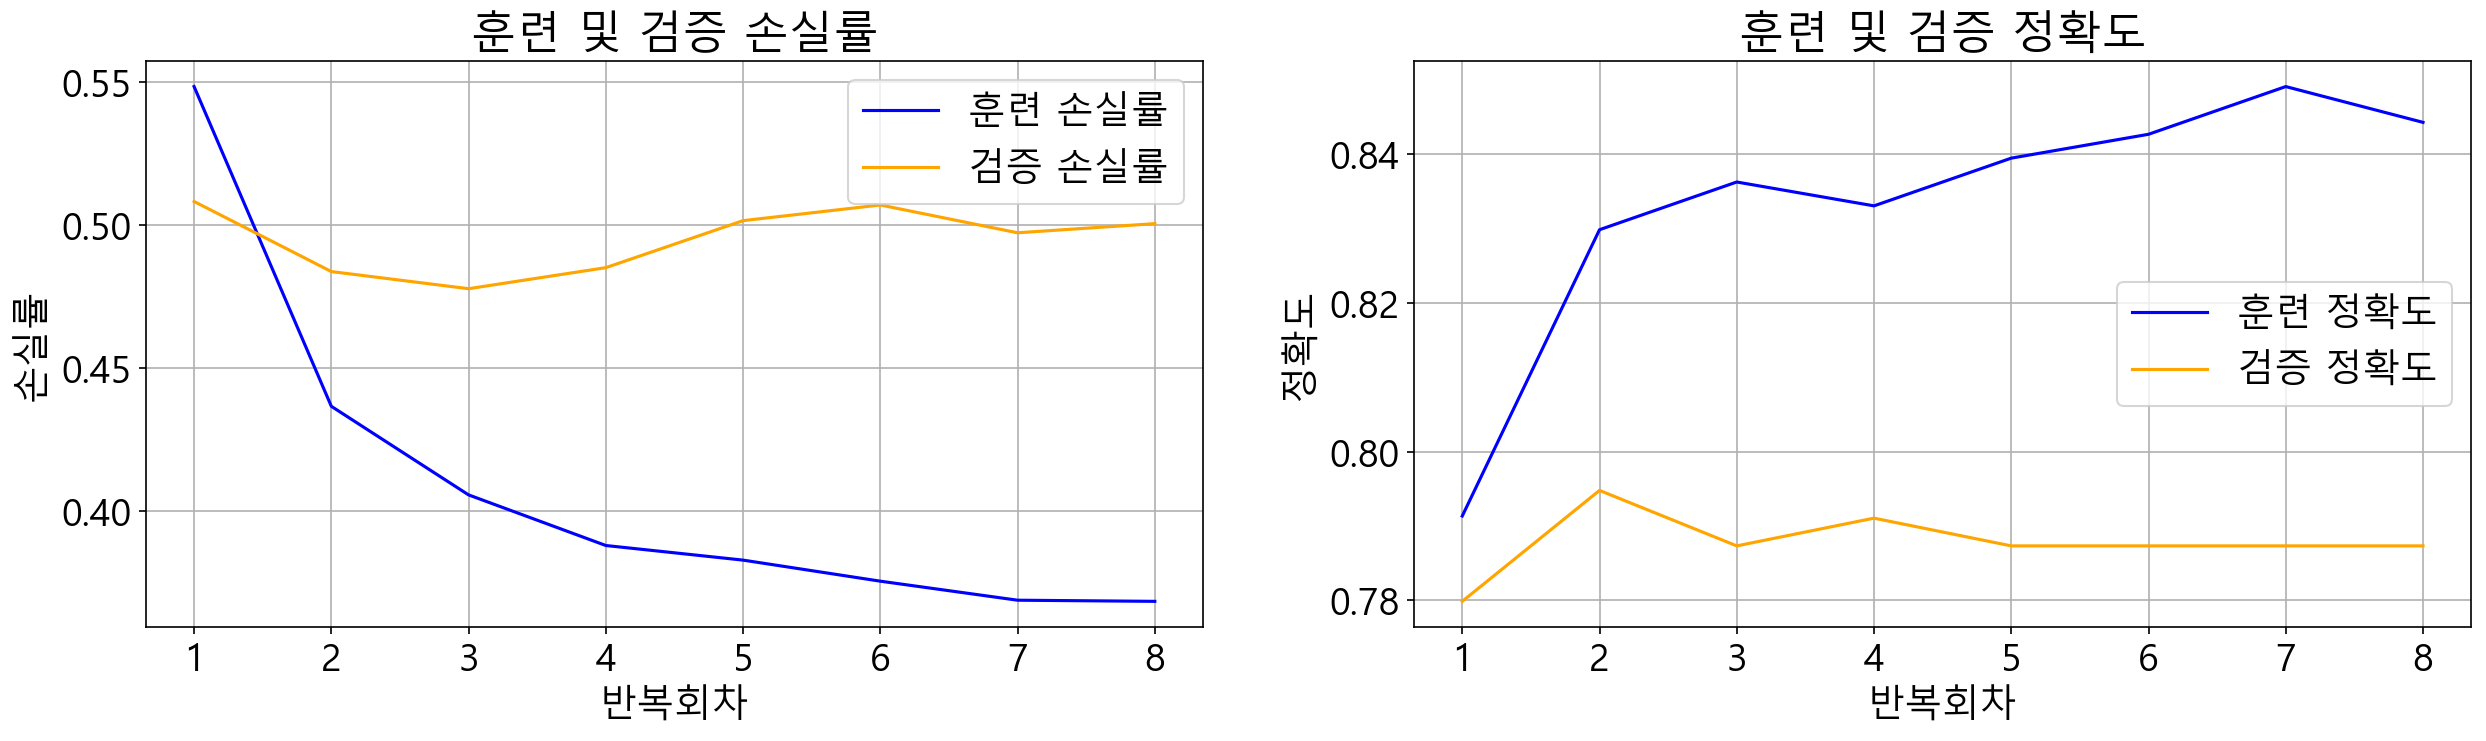

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', 
             label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange',
             label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 정확도 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='acc', data=result_df, color = 'blue', 
             label = '훈련 정확도', ax=ax2)
sns.lineplot(x=result_df.index, y='val_acc', data=result_df, color = 'orange',
             label = '검증 정확도', ax=ax2)
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

### 학습 결과 적용

#### 테스트 데이터에 대한 예측 결과 산정

In [30]:
# 테스트 데이터로 예측치 만들기

results = model.predict(x_test)
data_count, case_count = results.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(results)

268개의 검증 데이터가 1개의 경우의 수를 갖는다.
[[0.33473372]
 [0.08786875]
 [0.09082541]
 [0.98635745]
 [0.19994381]
 [0.09152764]
 [0.09152764]
 [0.6649817 ]
 [0.09465307]
 [0.4020979 ]
 [0.2718839 ]
 [0.99205196]
 [0.59507096]
 [0.09382212]
 [0.16502848]
 [0.98552626]
 [0.411938  ]
 [0.08787611]
 [0.10362178]
 [0.6317649 ]
 [0.09152764]
 [0.09381014]
 [0.31115162]
 [0.09083092]
 [0.02053857]
 [0.09152764]
 [0.09643   ]
 [0.9082816 ]
 [0.09085491]
 [0.1432707 ]
 [0.9912671 ]
 [0.5493236 ]
 [0.0915108 ]
 [0.27261078]
 [0.23842421]
 [0.30322832]
 [0.09163469]
 [0.48191693]
 [0.08612475]
 [0.9175036 ]
 [0.10667208]
 [0.11681554]
 [0.13172767]
 [0.629555  ]
 [0.6032722 ]
 [0.09082541]
 [0.1313554 ]
 [0.13676777]
 [0.10272172]
 [0.46938223]
 [0.98755264]
 [0.38563025]
 [0.12892866]
 [0.6942202 ]
 [0.5951851 ]
 [0.04017031]
 [0.58525056]
 [0.08425456]
 [0.06791237]
 [0.39729536]
 [0.09524482]
 [0.14084843]
 [0.0201253 ]
 [0.10714591]
 [0.98179173]
 [0.08519459]
 [0.3812012 ]
 [0.08763888]
 [0.09125787]
 [0.

In [32]:
#실제 생전요버와 예측치를 활용하여 프레임 구성

# 예측치 데이터를 1차원 배열로 추출한다.
f_results = results.flatten()

# 데이터 프레임 만들기
kdf = pd.DataFrame({
    '결과값': y_test['Survived'],
    '생존확률(%)': np.round(f_results * 100, 1),
    '예측치' : np.round(f_results)
})

kdf

,결과값,생존확률(%),예측치
PassengerId,,,
120,0.0,33.500000,0.0
430,1.0,8.800000,0.0
599,0.0,9.100000,0.0
276,1.0,98.599998,1.0
121,0.0,20.000000,0.0
...,...,...,...
470,1.0,66.199997,1.0
698,1.0,59.500000,1.0
535,0.0,57.099998,1.0


In [34]:
# 실제값과 예측 결과에 대한 오차 행렬

cm = confusion_matrix(kdf['결과값'], kdf['예측치'])
cmdf1 = pd.DataFrame(cm, columns=['예측값(N)', '예측값(P)'], index=['실제값(F)', '실제값(T)'])
cmdf1

,예측값(N),예측값(P)
실제값(F),142,18
실제값(T),39,69


Text(25.0, 0.5, '결과값')

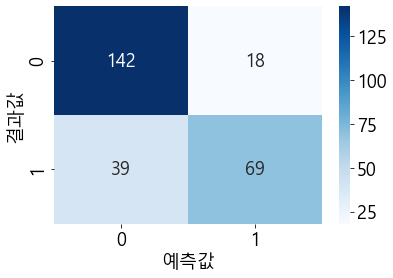

In [38]:
# 오차행렬 히트맵 시각화

# 오차 행렬을 히트맵 그래프로 표현
# -> annot : 그래프의 각 칸에 수치값 출력
# -> fmt : 수치값 출력 format (여기서는 10진수)
# -> cmap : 색상맵 (https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('예측값')
plt.ylabel('결과값')

In [39]:
# 분류 정확도 계산하기

x = (cmdf1['예측값(P)']['실제값(T)']+cmdf1['예측값(N)']['실제값(F)']) / len(y_test) * 100
print('머신러닝 분류 정확도 : %0.2f%%' % (x))

머신러닝 분류 정확도 : 78.73%


#### 실제 데이터로 예측해 보기

In [41]:
# 예측을 위한 데이터 프레임 준비

test_df = pd.DataFrame({
    'dicaprio': [3, 1, 19, 0, 0, 0],  # 영화속 남자 주인공 데이터
    'winslet': [1, 0, 17, 1, 1, 100], # 영화속 여자 주인공 데이터
    'someone': [1, 1, 40, 1, 0, 100]  # 임의의 데이터
}, index=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])
test_df

,dicaprio,winslet,someone
Pclass,3,1,1
Sex,1,0,1
Age,19,17,40
SibSp,0,1,1
Parch,0,1,0
Fare,0,100,100


In [43]:
# 전치 구하기

real_df = test_df.T
real_df

,Pclass,Sex,Age,SibSp,Parch,Fare
dicaprio,3,1,19,0,0,0
winslet,1,0,17,1,1,100
someone,1,1,40,1,0,100


In [44]:
# 데이터 표준화

std_data = scaler.transform(real_df)
std_data

array([[ 0.82737722,  0.73769511, -0.79628599, -0.4745452 , -0.47367361,
        -0.64842164],
       [-1.56610688, -1.3555735 , -0.94998568,  0.43279337,  0.76762988,
         1.36504703],
       [-1.56610688,  0.73769511,  0.81756072,  0.43279337, -0.47367361,
         1.36504703]])

In [46]:
# 데이터 표준화를 데이터 프레임으로 재구성

std_df = pd.DataFrame(std_data, columns=real_df.columns, index=real_df.index)
std_df

,Pclass,Sex,Age,SibSp,Parch,Fare
dicaprio,0.827377,0.737695,-0.796286,-0.474545,-0.473674,-0.648422
winslet,-1.566107,-1.355574,-0.949986,0.432793,0.767630,1.365047
someone,-1.566107,0.737695,0.817561,0.432793,-0.473674,1.365047


In [47]:
# 결과 예측하기 

results = model.predict(std_df)
data_count, case_count = results.shape
print("%d개의 임의의 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(results)

3개의 임의의 데이터가 1개의 경우의 수를 갖는다.
[[0.10362178]
 [0.9899163 ]
 [0.35256243]]


In [49]:
# 결과 표시

for i, v in enumerate(results.flatten()):
    print("%s의 생존 확률은 %0.1f%% 입니다." % (std_df.index[i], v*100))

dicaprio의 생존 확률은 10.4% 입니다.
winslet의 생존 확률은 99.0% 입니다.
someone의 생존 확률은 35.3% 입니다.
